<a href="https://colab.research.google.com/github/mashfiq-zaman/CSE422--Artificial-Intelligence-/blob/main/23101249__Rafia_Islam_23101030_MD_Mashfiq_Uz_Zaman_CSE422_09_Colab_Spring25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
discount=pd.read_csv('/content/drive/MyDrive/15.csv')
discount.head(2)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True


In [ ]:
discount.shape

(12575, 11)

Dataset Description

In [ ]:
print(f'There are {(discount.shape[1])-1} Features in the dataset and 1 target variable.')
print(f'Number of datapoints are {discount.shape[0]}')

print('Types of features are :')
print(discount.dtypes)

There are 10 Features in the dataset and 1 target variable.
Number of datapoints are 12575
Types of features are :
Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object


Data Analysis EDA

In [ ]:
discount.info() ##overview of data

categorical=discount.select_dtypes(include= 'object')
categorical_features=categorical.columns.tolist()
print(f'There are {len(categorical_features)} categorical features:\n{categorical_features}')    #categorial data and its count

numerical=discount.select_dtypes(include= 'number')
numerical_features=numerical.columns.tolist()
print(f'There are {len(numerical_features)} numerical features:\n{numerical_features}')      #numerical value and its count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB
There are 8 categorical features:
['Transaction ID', 'Customer ID', 'Category', 'Item', 'Payment Method', 'Location', 'Transaction Date', 'Discount Applied']
There are 3 numerical features:
['Price Per Unit', 'Quantity', 'Total 

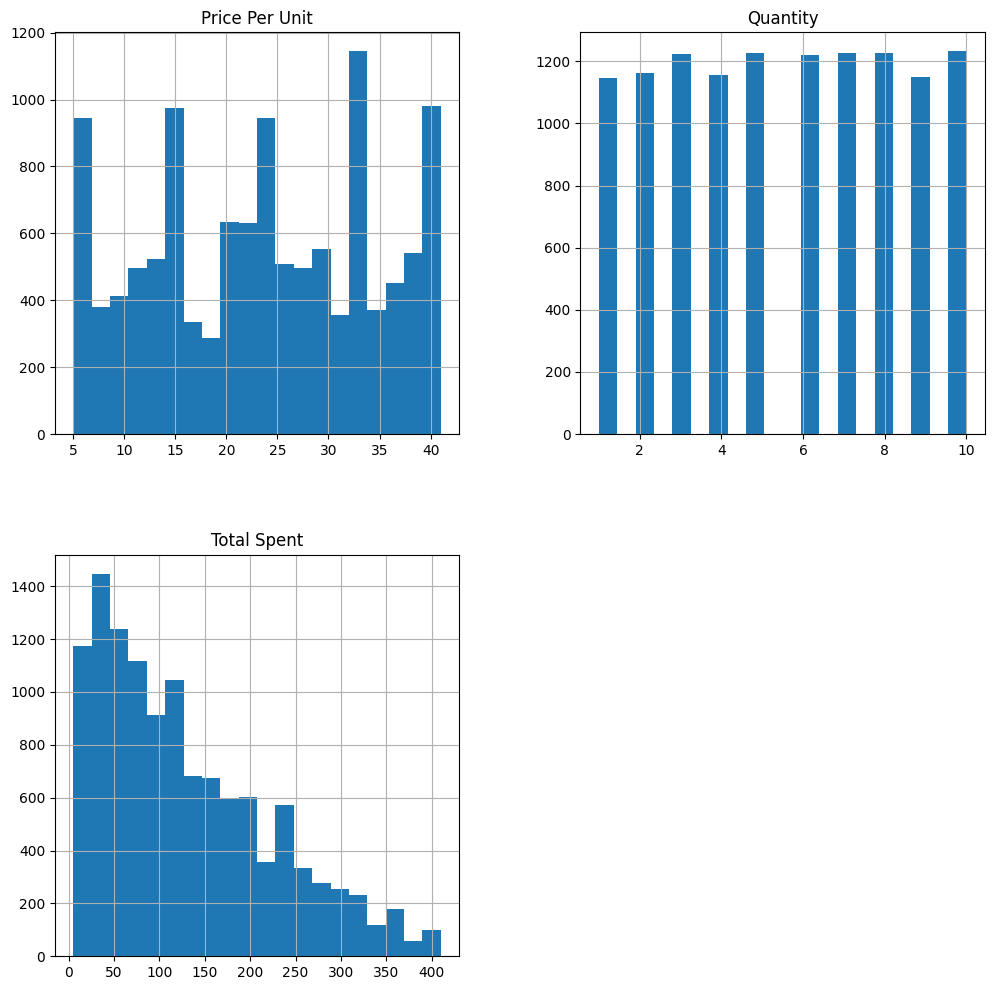

In [ ]:
#histogram
numerical.hist(figsize=(12,12),bins=20)
plt.show()

Check imbalance in the data

In [ ]:
#group instances based on the classes in y variable
class_counts=discount.groupby("Discount Applied").size()

columns=['Discount Applied','count','percentage']
outcome=['False','True']
count=list()
percentage=list()

#Calculate the percentage of each value of the y variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/discount.shape[0])*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

<ipython-input-95-07b2aef12c02>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count.append(class_counts[val])
<ipython-input-95-07b2aef12c02>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent=(class_counts[val]/discount.shape[0])*100


,Discount Applied,count,percentage
0,False,4157,33.057654
1,True,4219,33.550696


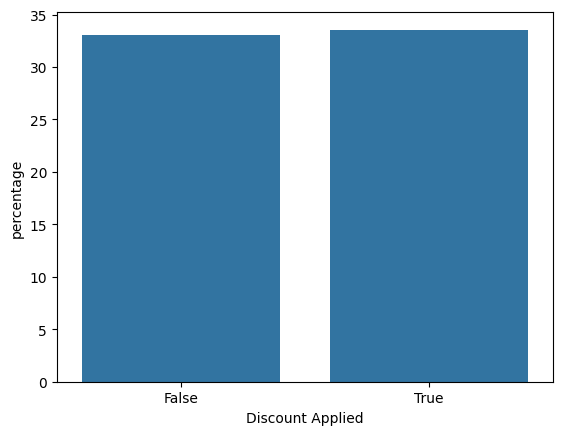

In [ ]:
#barplot
sns.barplot(data=imbalance_df,x=imbalance_df['Discount Applied'],y=imbalance_df['percentage'])
plt.show()

Data Preprocessing

In [ ]:
discount.shape

(12575, 11)

In [ ]:
#checking null values
discount.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
#checking duplicate values
print(discount.duplicated().sum())

0


In [ ]:
#dropping rows where target- discount applied null
print("Shape of dataset before dropping:", discount.shape)
discount = discount.dropna(axis = 0, subset = ['Discount Applied'])
print("Shape after dropping:", discount.shape)

Shape of dataset before dropping: (12575, 11)
Shape after dropping: (8376, 11)


In [ ]:
#group instances based on the classes in y variable
class_counts=discount.groupby("Discount Applied").size()

columns=['Discount Applied','count','percentage']
outcome=['False','True']
count=list()
percentage=list()

#Calculate the percentage of each value of the y variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/discount.shape[0])*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

<ipython-input-101-07b2aef12c02>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count.append(class_counts[val])
<ipython-input-101-07b2aef12c02>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent=(class_counts[val]/discount.shape[0])*100


,Discount Applied,count,percentage
0,False,4157,49.629895
1,True,4219,50.370105


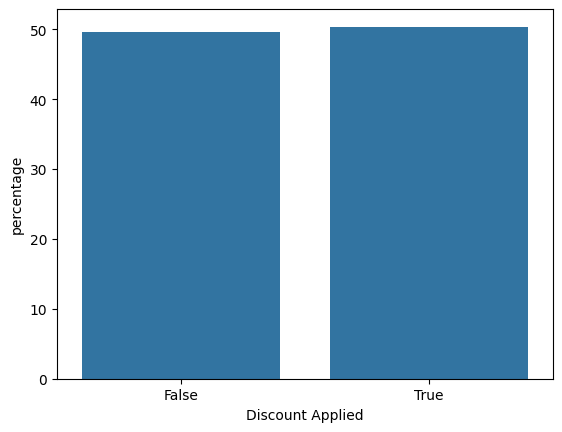

In [ ]:
#barplot
sns.barplot(data=imbalance_df,x=imbalance_df['Discount Applied'],y=imbalance_df['percentage'])
plt.show()

In [ ]:
#Data impute

from sklearn.impute import SimpleImputer

numerical=SimpleImputer(missing_values=np.nan,strategy='median')
discount.loc[:,['Price Per Unit','Total Spent']]=numerical.fit_transform(discount[['Price Per Unit','Total Spent']])

numerical=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
discount.loc[:,['Quantity']]=numerical.fit_transform(discount[['Quantity']])

categorial=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
discount.loc[:,['Item']]=categorial.fit_transform(discount[['Item']])

discount.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,0
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
discount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8376 entries, 0 to 12573
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    8376 non-null   object 
 1   Customer ID       8376 non-null   object 
 2   Category          8376 non-null   object 
 3   Item              8376 non-null   object 
 4   Price Per Unit    8376 non-null   float64
 5   Quantity          8376 non-null   float64
 6   Total Spent       8376 non-null   float64
 7   Payment Method    8376 non-null   object 
 8   Location          8376 non-null   object 
 9   Transaction Date  8376 non-null   object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 785.2+ KB


Feature Engineering:

encoding categorical variables, date time feature, feature selection

In [ ]:
#onehot encoding for category,payment,location  column bcz its simple has less values and nominal

category_encode_onehot = pd.get_dummies(discount['Category'])
payment_encode_onehot = pd.get_dummies(discount['Payment Method'])
location_encode_onehot = pd.get_dummies(discount['Location'])
category_encode_onehot.head()
payment_encode_onehot.head()
location_encode_onehot.head()
#label encoding for item column bcz it has a large num of unique values(large data)
label=LabelEncoder()
discount['Item']=label.fit_transform(discount['Item'])

#date-time feature
discount['Transaction Date'] = pd.to_datetime(discount['Transaction Date'])
discount['Year'] = discount['Transaction Date'].dt.year
discount['Month'] = discount['Transaction Date'].dt.month
discount['Day'] = discount['Transaction Date'].dt.day

#Feature selection: Removing transID, CustID, TransDate as irrelevant feature
discount = discount.drop(['Transaction ID', 'Customer ID','Category', 'Payment Method', 'Location', 'Transaction Date'], axis=1)
discount = pd.concat([discount, category_encode_onehot, payment_encode_onehot, location_encode_onehot], axis=1)

In [ ]:
discount.head(3)

,Item,Price Per Unit,Quantity,Total Spent,Discount Applied,Year,Month,Day,Beverages,Butchers,...,Electric household essentials,Food,Furniture,Milk Products,Patisserie,Cash,Credit Card,Digital Wallet,In-store,Online
0,7,18.5,10.0,185.0,True,2024,4,8,False,False,...,False,False,False,False,True,False,False,True,False,True
1,62,29.0,9.0,261.0,True,2023,7,23,False,False,...,False,False,False,True,False,False,False,True,False,True
2,17,21.5,2.0,43.0,False,2022,10,5,False,True,...,False,False,False,False,False,False,True,False,False,True


Checking Correlation

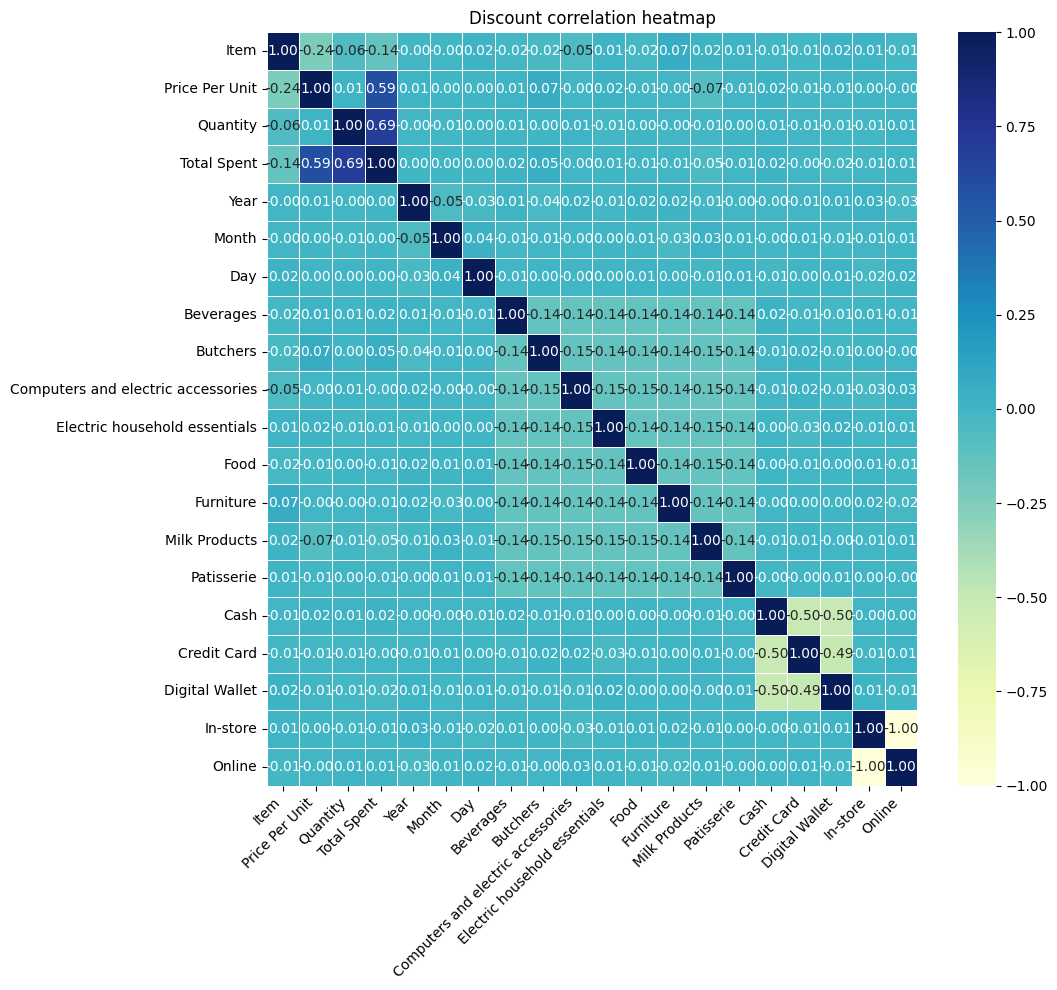

In [ ]:
discount_corr = discount.corr(numeric_only=True)

plt.figure(figsize=(11,10))
sns.heatmap(discount_corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Discount correlation heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#dropping instore column
discount = discount.drop(['In-store'], axis=1)

Feature Scaling

In [ ]:
#train,test-split
x=discount.drop('Discount Applied', axis=1)
y=discount['Discount Applied']

x_train,x_test,y_train,y_test=train_test_split( x, y, random_state=1)

scaler = StandardScaler()

y_train = y_train.astype(int)
y_test = y_test.astype(int)

x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)
x_train_scale = pd.DataFrame(x_train_scale,columns=x_train.columns)  #creates a dataframe
x_train_scale.head()

print(x_train_scale.shape)
print(y_train.shape)
print(x_test_scale.shape)

(6282, 19)
(6282,)
(2094, 19)


Model Evaluation


Neural Network

Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4946 - loss: 0.7086 - val_accuracy: 0.5036 - val_loss: 0.6997
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5389 - loss: 0.6901 - val_accuracy: 0.5402 - val_loss: 0.6929
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5343 - loss: 0.6886 - val_accuracy: 0.5259 - val_loss: 0.6970
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5606 - loss: 0.6846 - val_accuracy: 0.5139 - val_loss: 0.6997
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5757 - loss: 0.6784 - val_accuracy: 0.5052 - val_loss: 0.7015
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5669 - loss: 0.6783 - val_accuracy: 0.5004 - val_loss: 0.7023
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5701 - loss: 0.6818 - val_accuracy: 0.5259 - val_loss: 0.7008
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5718 - loss: 0.6782 - val_accuracy: 0.

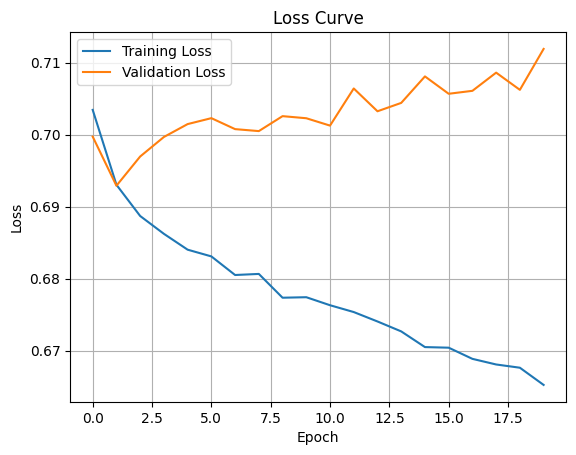

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4966 - loss: 0.7194
Testing Accuracy: 48.23%


In [ ]:
# Create nn model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


model = Sequential([
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_scale, y_train,
                    epochs=20, batch_size=20,
                    validation_split=0.2,
                    verbose=1)

# loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test_scale, y_test)
print(f"Testing Accuracy: {round(test_accuracy * 100, 2)}%")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


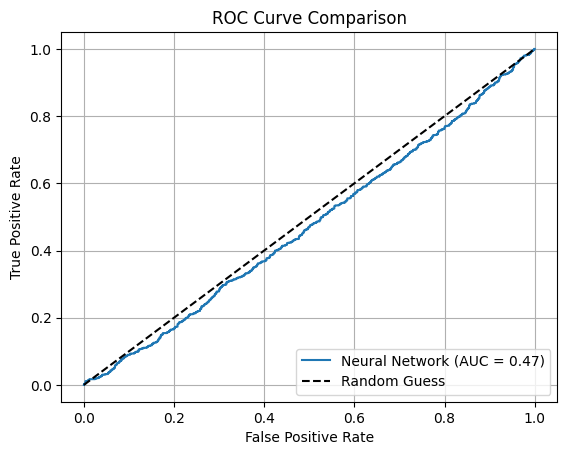

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_nn = model.predict(x_test_scale)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_nn)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f"Neural Network (AUC = {roc_auc:.2f})")

# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot setup
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Logistic Regression & Random Forest

ROC, AUC Curve

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


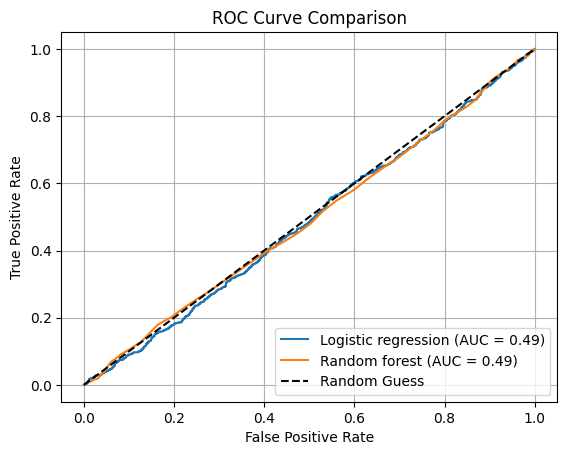

In [ ]:
#training models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train_scale, y_train)
y_pred_log = log_model.predict(x_test_scale)
y_probs_l= log_model.predict_proba(x_test_scale)[:, 1]

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scale, y_train)
y_pred_rf = rf_model.predict(x_test_scale)
y_probs_r= rf_model.predict_proba(x_test_scale)[:, 1]



fpr, tpr, _ = roc_curve(y_test, y_probs_l)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Logistic regression (AUC = {roc_auc:.2f})")

fpr, tpr, _ = roc_curve(y_test, y_probs_r)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Random forest (AUC = {roc_auc:.2f})")


# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot setup
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Confusion matrix, accuracy

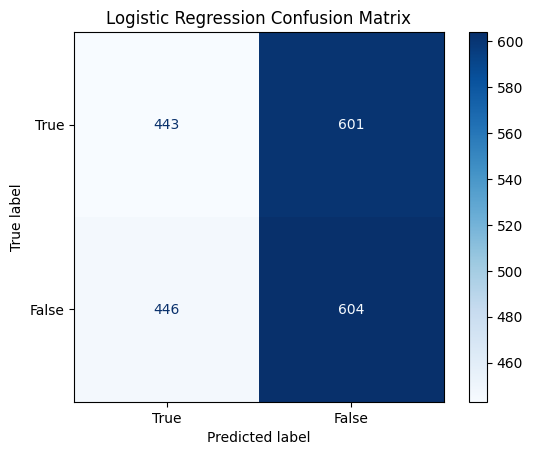

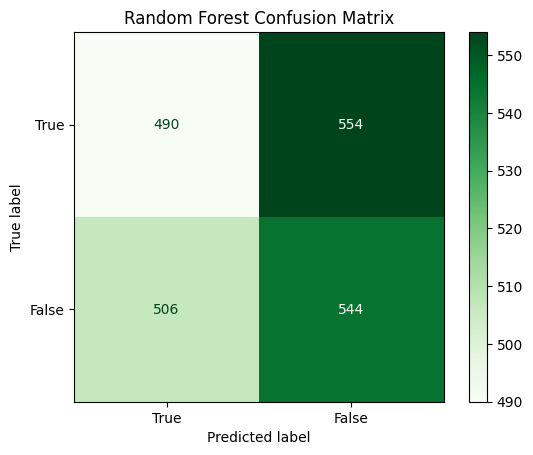

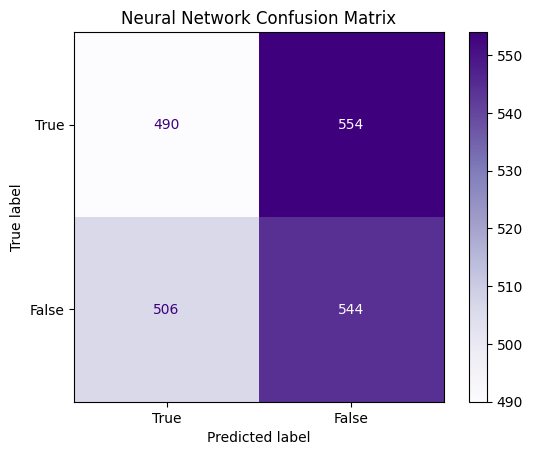

Logistic Regression Accuracy: 0.5
Random Forest Accuracy: 0.49379178605539636
Neural Network Accuracy: 0.48233046800382046


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=discount['Discount Applied'].unique()).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=discount['Discount Applied'].unique()).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()


y_pred_nn_labels = (y_pred_nn > 0.5).astype(int)

# Now compute the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_labels)

ConfusionMatrixDisplay(cm_rf, display_labels=discount['Discount Applied'].unique()).plot(cmap="Purples")
plt.title("Neural Network Confusion Matrix")
plt.show()
# Accuracy comparison
lr_acc=accuracy_score(y_test, y_pred_log)
rf_acc=accuracy_score(y_test, y_pred_rf)
nn_acc=accuracy_score(y_test, y_pred_nn_labels)
print("Logistic Regression Accuracy:", lr_acc)
print("Random Forest Accuracy:", rf_acc)
print("Neural Network Accuracy:", nn_acc)

In [ ]:
print(x_train_scale.shape)
print(y_train.shape)
print(x_test_scale.shape)

(6282, 19)
(6282,)
(2094, 19)


In [ ]:
#collecting f1 scores
from sklearn.metrics import f1_score
lr_f1=f1_score(y_test, y_pred_log)
rf_f1=f1_score(y_test, y_pred_rf)
nn_f1 = f1_score(y_test, y_pred_nn_labels)
print(lr_f1,rf_f1,nn_f1 )

0.5356984478935698 0.5065176908752328 0.45472837022132795


Barchart showing accuracy and f1 scores

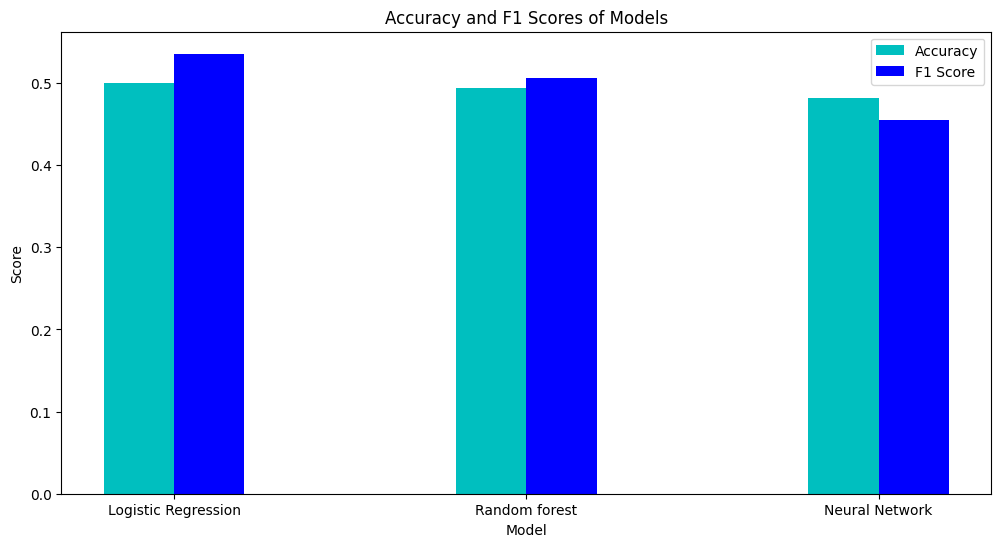

In [ ]:
 models = ['Logistic Regression', 'Random forest', 'Neural Network']
accuracy= [lr_acc,rf_acc,nn_acc]
f1= [lr_f1,rf_f1,nn_f1]


fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(3)
width = 0.2

accuracy_bars = ax.bar(index, accuracy, width, label='Accuracy', color='c')
f1_bars = ax.bar(index + width, f1, width, label='F1 Score', color='b')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Accuracy and F1 Scores of Models')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()

Performance metrics comparison

In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=discount['Discount Applied'].unique().astype(str)))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=discount['Discount Applied'].unique().astype(str)))

print("Neural Network:")
print(classification_report(y_test, y_pred_nn_labels, target_names=discount['Discount Applied'].unique().astype(str)))

Logistic Regression:
              precision    recall  f1-score   support

        True       0.50      0.42      0.46      1044
       False       0.50      0.58      0.54      1050

    accuracy                           0.50      2094
   macro avg       0.50      0.50      0.50      2094
weighted avg       0.50      0.50      0.50      2094

Random Forest:
              precision    recall  f1-score   support

        True       0.49      0.47      0.48      1044
       False       0.50      0.52      0.51      1050

    accuracy                           0.49      2094
   macro avg       0.49      0.49      0.49      2094
weighted avg       0.49      0.49      0.49      2094

Neural Network:
              precision    recall  f1-score   support

        True       0.48      0.53      0.51      1044
       False       0.48      0.43      0.45      1050

    accuracy                           0.48      2094
   macro avg       0.48      0.48      0.48      2094
weighted avg       0.4